# Guide
## Code
In [3] `base_dir` : 실제 데이터 경로로 변경 필요

In [1]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers
import os

2024-11-24 15:11:51.404321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_size = (224, 224)
batch_size = 32

In [3]:
# 데이터셋 로드
from tensorflow.keras.utils import image_dataset_from_directory

# 실제 데이터의 경로로 변경 필요
base_dir = "/tf/Fixed_Data/Data_Final/Step2-2"

train_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=image_size,
    batch_size=batch_size)

validation_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'validation'),
    image_size=image_size,
    batch_size=batch_size)

test_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=image_size,
    batch_size=batch_size)

Found 11340 files belonging to 18 classes.
Found 3240 files belonging to 18 classes.
Found 1620 files belonging to 18 classes.


2024-11-24 15:11:53.142561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-24 15:11:53.145866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-24 15:11:53.145953: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
from tensorflow.keras.applications import VGG16


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256, activation = "relu")(x) 
outputs = layers.Dense(18, activation="softmax")(x)

model = keras.Model(inputs=base_model.input, outputs=outputs)

for layer in base_model.layers:
    layer.trainable = False

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
optimizer = optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',       # 검증 손실을 기준으로 학습 중단
    patience=5,               # 성능이 개선되지 않는 에포크 수 (5회 연속 개선 없을 시 중단)
    restore_best_weights=True # 최적의 가중치 복원
)

In [8]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=batch_size)

Epoch 1/100


2024-11-24 15:11:54.930577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-11-24 15:11:55.277347: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-11-24 15:11:55.295187: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f77366f7370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-24 15:11:55.295208: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-24 15:11:55.298406: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-24 15:11:55.369820: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

355/355 [==============================] - 19s 48ms/step - loss: 3.2394 - accuracy: 0.5559 - val_loss: 0.8767 - val_accuracy: 0.7861
Epoch 2/100
355/355 [==============================] - 17s 46ms/step - loss: 0.9311 - accuracy: 0.7984 - val_loss: 0.7031 - val_accuracy: 0.8438
Epoch 3/100
355/355 [==============================] - 16s 46ms/step - loss: 0.6038 - accuracy: 0.8688 - val_loss: 0.6798 - val_accuracy: 0.8710
Epoch 4/100
355/355 [==============================] - 16s 45ms/step - loss: 0.4507 - accuracy: 0.9041 - val_loss: 0.6646 - val_accuracy: 0.8843
Epoch 5/100
355/355 [==============================] - 16s 45ms/step - loss: 0.3394 - accuracy: 0.9269 - val_loss: 0.6324 - val_accuracy: 0.9000
Epoch 6/100
355/355 [==============================] - 16s 45ms/step - loss: 0.2848 - accuracy: 0.9403 - val_loss: 0.7143 - val_accuracy: 0.8994
Epoch 7/100
355/355 [==============================] - 16s 45ms/step - loss: 0.2398 - accuracy: 0.9534 - val_loss: 0.6838 - val_accuracy: 0.90

In [9]:
for layer in base_model.layers[:15]:
    layer.trainable = False

for layer in base_model.layers[15:]:
    layer.trainable = True
    
optimizer = optimizers.RMSprop(learning_rate=1e-5)

model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [10]:
history1 = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=batch_size)

Epoch 1/100
355/355 [==============================] - 17s 44ms/step - loss: 0.1734 - accuracy: 0.9587 - val_loss: 0.5037 - val_accuracy: 0.9080
Epoch 2/100
355/355 [==============================] - 16s 44ms/step - loss: 0.1072 - accuracy: 0.9713 - val_loss: 0.4732 - val_accuracy: 0.9093
Epoch 3/100
355/355 [==============================] - 16s 43ms/step - loss: 0.0736 - accuracy: 0.9789 - val_loss: 0.4918 - val_accuracy: 0.9198
Epoch 4/100
355/355 [==============================] - 16s 43ms/step - loss: 0.0732 - accuracy: 0.9810 - val_loss: 0.4137 - val_accuracy: 0.9244
Epoch 5/100
355/355 [==============================] - 16s 44ms/step - loss: 0.0510 - accuracy: 0.9847 - val_loss: 0.4640 - val_accuracy: 0.9247
Epoch 6/100
355/355 [==============================] - 16s 44ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.4864 - val_accuracy: 0.9225
Epoch 7/100
355/355 [==============================] - 16s 43ms/step - loss: 0.0491 - accuracy: 0.9874 - val_loss: 0.4263 - val_ac

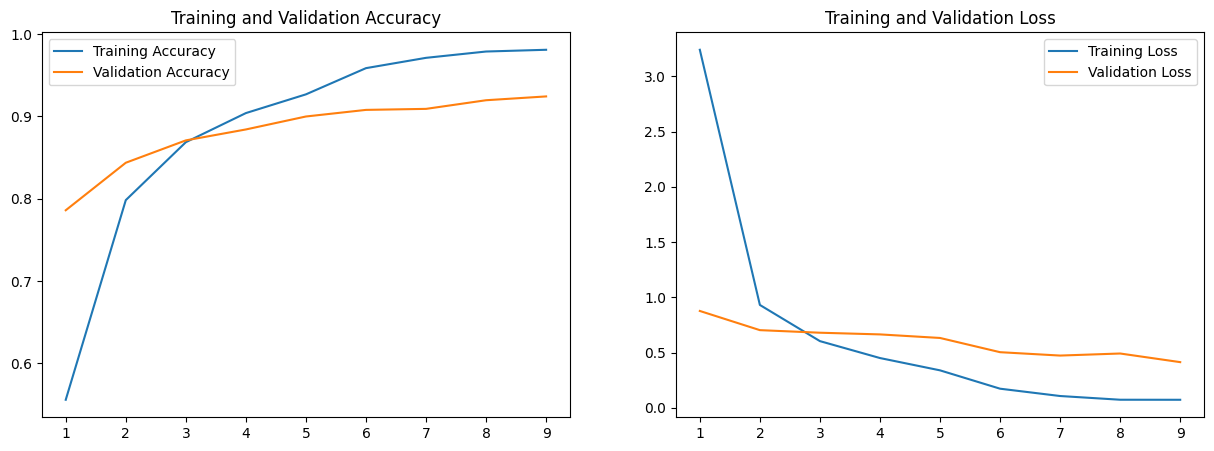

In [11]:
# 훈련 정확도와 손실 그래프 생성
import matplotlib.pyplot as plt 

acc = history.history['accuracy'][:-5] + history1.history['accuracy'][:-5]          # history.history['accuracy']
val_acc = history.history['val_accuracy'][:-5] + history1.history['val_accuracy'][:-5]   # history.history['val_accuracy']
loss = history.history['loss'][:-5] + history1.history['loss'][:-5]                # history.history['loss']
val_loss = history.history['val_loss'][:-5] + history1.history['val_loss'][:-5]     # history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_dataset)

print(f"test accuracy: {test_acc}")
print(f"test loss: {test_loss}")

51/51 [==============================] - 2s 35ms/step - loss: 0.4377 - accuracy: 0.9247
test accuracy: 0.924691379070282
test loss: 0.4376610219478607
